In [12]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model

import os
import cv2
import string
import numpy as np

In [13]:
symbols = string.ascii_lowercase + "0123456789" # All symbols captcha can contain
num_symbols = len(symbols)
img_shape = (50, 200, 1)

print(symbols,num_symbols)

caminho = os.getcwd()
caminho = caminho.replace("\\", "/")

abcdefghijklmnopqrstuvwxyz0123456789 36


In [14]:
def create_model():
    img = layers.Input(shape=img_shape) # Get image as an input and process it through some Convs
    conv1 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(img)
    mp1 = layers.MaxPooling2D(padding='same')(conv1)  # 100x25
    conv2 = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(mp1)
    mp2 = layers.MaxPooling2D(padding='same')(conv2)  # 50x13
    conv3 = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(mp2)
    mp3 = layers.MaxPooling2D(padding='same')(conv3)  # 25x7
    conv4 = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(mp3)
    bn = layers.BatchNormalization()(conv4)
    mp4 = layers.MaxPooling2D(padding='same')(bn)  # 13x4
    
    # Get flattened vector and make 5 branches from it. Each branch will predict one letter
    flat = layers.Flatten()(mp4)
    outs = []
    for _ in range(5):
        dens1 = layers.Dense(256, activation='relu')(flat)
        drop = layers.Dropout(0.5)(dens1)
        res = layers.Dense(num_symbols, activation='softmax')(drop)

        outs.append(res)
    
    # Compile model and return it
    model = Model(img, outs)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
    return model

In [15]:
def preprocess_data(caminho):

    n_samples = len(os.listdir(caminho + '/samples/samples'))
    X = np.zeros((n_samples, 50, 200, 1)) #1070*50*200
    y = np.zeros((5, n_samples, num_symbols)) #5*1070*36

    for i, pic in enumerate(os.listdir(caminho + '/samples/samples')):
        # Read image as grayscale
        img = cv2.imread(os.path.join(caminho + '/samples/samples', pic), cv2.IMREAD_GRAYSCALE)
        pic_target = pic[:-4]
        if len(pic_target) < 6:
            # Scale and reshape image
            img = img / 255.0
            img = np.reshape(img, (50, 200, 1))
            # Define targets and code them using OneHotEncoding
            targs = np.zeros((5, num_symbols))
            for j, l in enumerate(pic_target):
                ind = symbols.find(l)
                targs[j, ind] = 1
                print(targs)
            X[i] = img
            y[:, i] = targs
    
    # Return final data
    return X, y

In [16]:
X, y = preprocess_data(caminho)
X_train, y_train = X[:970], y[:, :970]
X_test, y_test = X[970:], y[:, 970:]

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0

In [17]:
model = create_model()
model.summary()
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 50, 200, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_4 (Conv2D)              (None, 50, 200, 32)  320         ['input_2[0][0]']                
                                                                                                  
 max_pooling2d_4 (MaxPooling2D)  (None, 25, 100, 32)  0          ['conv2d_4[0][0]']               
                                                                                                  
 conv2d_5 (Conv2D)              (None, 25, 100, 64)  18496       ['max_pooling2d_4[0][0]']  

In [18]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [19]:
# Train the model
hist = model.fit(X_train, [y_train[0], y_train[1], y_train[2], y_train[3], y_train[4]], 
                 batch_size=64, epochs=100, verbose=1, 
                 validation_split=0.2, callbacks=[es])

Epoch 1/100
13/13 [==============================] - 5s 111ms/step - loss: 18.2967 - dense_11_loss: 3.8337 - dense_13_loss: 3.5912 - dense_15_loss: 3.6649 - dense_17_loss: 3.5842 - dense_19_loss: 3.6228 - dense_11_accuracy: 0.0477 - dense_13_accuracy: 0.0657 - dense_15_accuracy: 0.0683 - dense_17_accuracy: 0.0580 - dense_19_accuracy: 0.0567 - val_loss: 17.6145 - val_dense_11_loss: 3.5253 - val_dense_13_loss: 3.5202 - val_dense_15_loss: 3.5237 - val_dense_17_loss: 3.5168 - val_dense_19_loss: 3.5285 - val_dense_11_accuracy: 0.0567 - val_dense_13_accuracy: 0.0567 - val_dense_15_accuracy: 0.0619 - val_dense_17_accuracy: 0.0773 - val_dense_19_accuracy: 0.0567
Epoch 2/100
13/13 [==============================] - 1s 63ms/step - loss: 15.9148 - dense_11_loss: 3.1922 - dense_13_loss: 3.1612 - dense_15_loss: 3.2079 - dense_17_loss: 3.1821 - dense_19_loss: 3.1715 - dense_11_accuracy: 0.0889 - dense_13_accuracy: 0.0580 - dense_15_accuracy: 0.0799 - dense_17_accuracy: 0.0644 - dense_19_accuracy: 0.

In [9]:
# Function to predict the captcha
def predict(filepath):
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        img = img / 255.0
    else:
        print("Image not detected")
        return None
    res = np.array(model.predict(img[np.newaxis, :, :, np.newaxis]))
    ans = np.reshape(res, (5, num_symbols))
    captcha = ""
    for i in range(5):
        captcha += symbols[np.argmax(ans[i])]
    return captcha

In [10]:
import matplotlib.pyplot as plt

filepath = caminho+"/samples/23mdg.png"

def plot_predicted_sample(filepath):
    # Predict captcha
    captcha = predict(filepath)

    # Load image
    img = cv2.imread(filepath)

    # Plot image and predicted captcha
    fig, ax = plt.subplots()
    ax.imshow(img)
    ax.set_title(f"Predicted Captcha: {captcha}")
    plt.show()

1/1 [==============================] - 0s 110ms/step


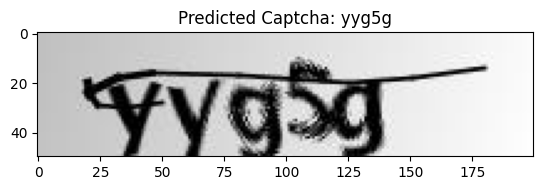

In [20]:
plot_predicted_sample(caminho+"/samples/yyg5g.png")